<a href="https://colab.research.google.com/github/Mahfuzpust/Tomato-Leaf-Disease-Detection/blob/main/Tomato_Leaf_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# ! unzip -q "/content/drive/MyDrive/Tomato/tomato.zip"

# Import Libraries

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(42)

# Image path

In [4]:
train_dir = "/content/drive/MyDrive/tomato/train"
test_dir = "/content/drive/MyDrive/tomato/val"

# # Kaggle
# train_dir = "../input/tomatoleaf/tomato/train"
# test_dir = "../input/tomatoleaf/tomato/val"

# Data Rescaling and augmentation

In [5]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",
    input_shape=(112, 112, 3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
], name ="data_augmentation")

## Load datasets (Shuffle and prefetch)

In [6]:
import tensorflow as tf

IMG_SIZE = (112, 112)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed=42
).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

class_names = test_data.class_names
valid_data = test_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


# Visualize images

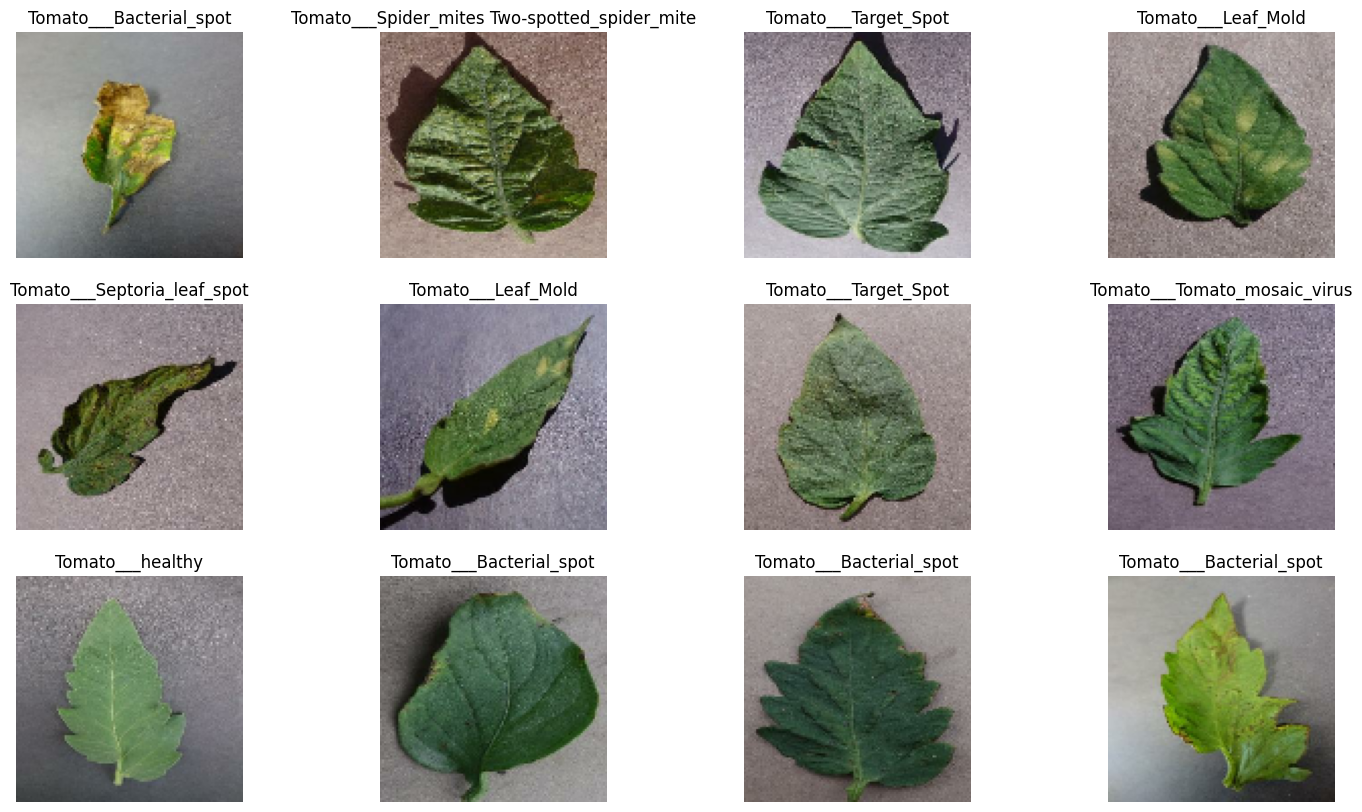

In [7]:
plt.figure(figsize=(18,10))
for image_batch,label_batch in train_data.take(1):
    for i in range(0,12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[np.argmax(label_batch[i])])
        plt.axis("off")

# Augmented image view

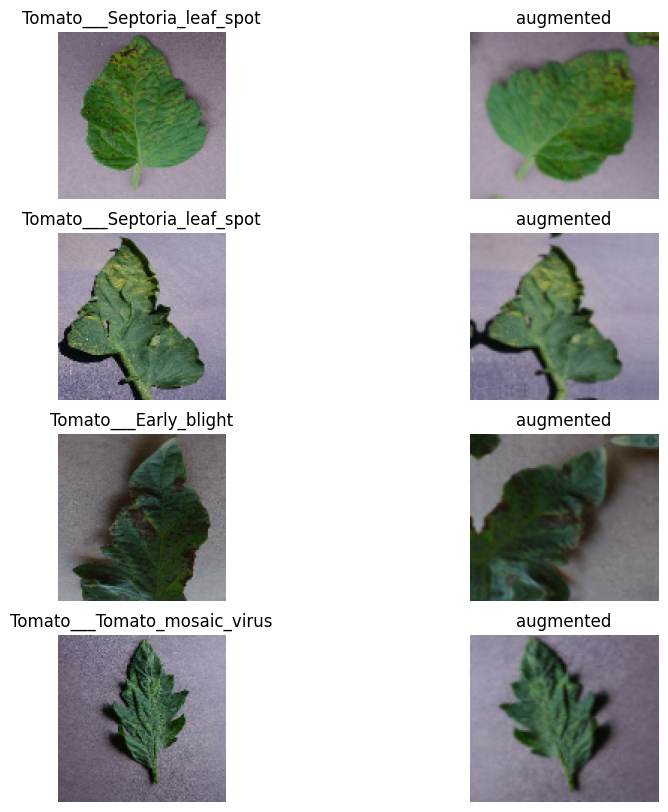

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in train_data.take(1):
    augmented_image_batch = data_augmentation(image_batch)
    image_plt_len = len(image_batch) if len(image_batch) < 4 else 4
    for i in range(0, image_plt_len):
        plt.subplot(image_plt_len,2,2*i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[np.argmax(label_batch[i])])
        plt.axis("off")
        plt.subplot(image_plt_len,2,2*i+2)
        plt.imshow(augmented_image_batch[i])
        plt.title(f"augmented")
        plt.axis("off")

# Create Checkpoint

In [9]:
checkpoint_path = "CheckPoint/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True
)

## Create model

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layers')

])

## Summary model

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2  (None, None, None, 32)    0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 16)    4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, None, None, 16)    0         
 g2D)                                                            
                                                        

In [12]:
import tensorflow as tf

model = tf.keras.Sequential([
    #data_augmentation,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax', name='output_layers')

])


model.build (input_shape=(32,112,112,3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (32, 110, 110, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (32, 55, 55, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (32, 53, 53, 16)          4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (32, 26, 26, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (32, 24, 24, 32)          4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (32, 12, 12, 32)         

# Compile model

In [13]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

## Fit the model

In [14]:
history = model.fit(
    train_data,
    epochs=300,
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data),
    callbacks = [
        checkpoint_callback
    ]
)

Epoch 1/300
313/313 [==============================] - 132s 393ms/step - loss: 2.7148 - accuracy: 0.2485 - val_loss: 1.6437 - val_accuracy: 0.4130
Epoch 2/300
313/313 [==============================] - 6s 18ms/step - loss: 1.4220 - accuracy: 0.4849 - val_loss: 1.1777 - val_accuracy: 0.5960
Epoch 3/300
313/313 [==============================] - 4s 14ms/step - loss: 1.0407 - accuracy: 0.6293 - val_loss: 0.9248 - val_accuracy: 0.6570
Epoch 4/300
313/313 [==============================] - 5s 17ms/step - loss: 0.8167 - accuracy: 0.7149 - val_loss: 0.9548 - val_accuracy: 0.6940
Epoch 5/300
313/313 [==============================] - 6s 19ms/step - loss: 0.7238 - accuracy: 0.7497 - val_loss: 0.7674 - val_accuracy: 0.7310
Epoch 6/300
313/313 [==============================] - 5s 15ms/step - loss: 0.6383 - accuracy: 0.7780 - val_loss: 0.6713 - val_accuracy: 0.7830
Epoch 7/300
313/313 [==============================] - 6s 19ms/step - loss: 0.5775 - accuracy: 0.7979 - val_loss: 0.5872 - val_accura

# Create plot_loss_curve function

In [15]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure(figsize=(12,6))
  # Plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

# Plot the model


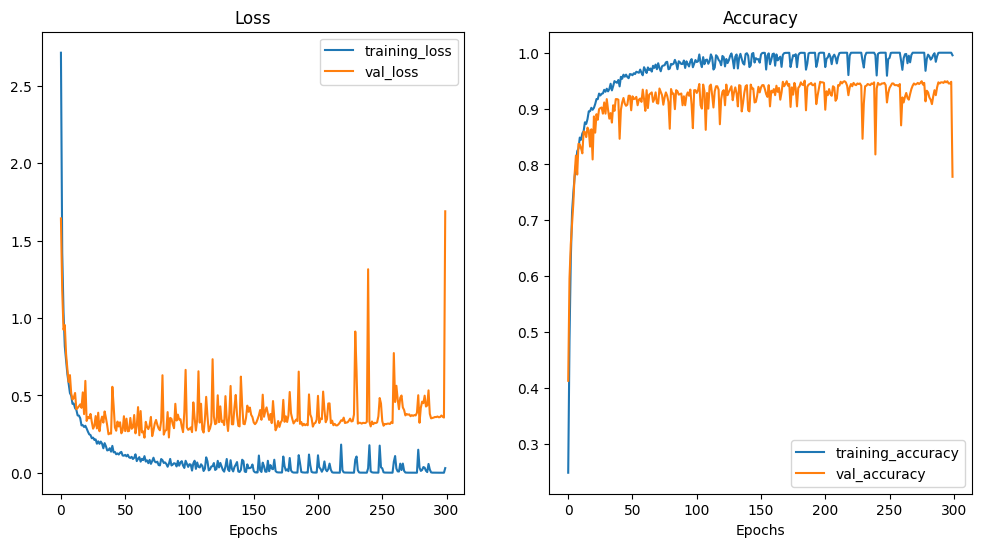

In [16]:
plot_loss_curves(history)

## Evaluate model

In [17]:
model.evaluate(test_data)

32/32 [==============================] - 1s 34ms/step - loss: 1.6898 - accuracy: 0.7780


[1.6898481845855713, 0.777999997138977]

# Evaluate best model

## Load the best weight

In [18]:
model.load_weights(checkpoint_path)

### Evaluate

In [19]:
model.evaluate(train_data), model.evaluate(test_data)

32/32 [==============================] - 1s 34ms/step - loss: 0.3342 - accuracy: 0.9500


([0.0006680508377030492, 0.9998999834060669],
 [0.3342253863811493, 0.949999988079071])

# Load pretrain model

## Download pre train model

In [20]:
! wget "https://github.com/Mahfuzpust/Tomato-Leaf-diseaes/raw/main/pretrain_model.h5"

--2023-12-04 04:03:50--  https://github.com/Mahfuzpust/Tomato-Leaf-diseaes/raw/main/pretrain_model.h5
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Mahfuzpust/Tomato-Leaf-diseaes/main/pretrain_model.h5 [following]
--2023-12-04 04:03:50--  https://raw.githubusercontent.com/Mahfuzpust/Tomato-Leaf-diseaes/main/pretrain_model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173280 (169K) [application/octet-stream]
Saving to: ‘pretrain_model.h5’

pretrain_model.h5   100%[===================>] 169.22K  --.-KB/s    in 0.03s   

2023-12-04 04:03:50 (5.13 MB/s) - ‘pretrain_model.h5’ saved [173280/173

# Laod model

In [21]:

load_model = tf.keras.models.load_model("pretrain_model.h5")

# Summary load_model

In [22]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2  (None, None, None, 32)    0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 16)    4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, None, None, 16)    0         
 g2D)                                                            
                                                        

# Evaluate load model with valid data or test_data

In [23]:
load_model.evaluate(train_data),load_model.evaluate(test_data)

32/32 [==============================] - 2s 51ms/step - loss: 0.0776 - accuracy: 0.9820


([0.03175169602036476, 0.9904999732971191],
 [0.07763724029064178, 0.9819999933242798])

# Prediction && visualize

1/1 [==============================] - 0s 170ms/step


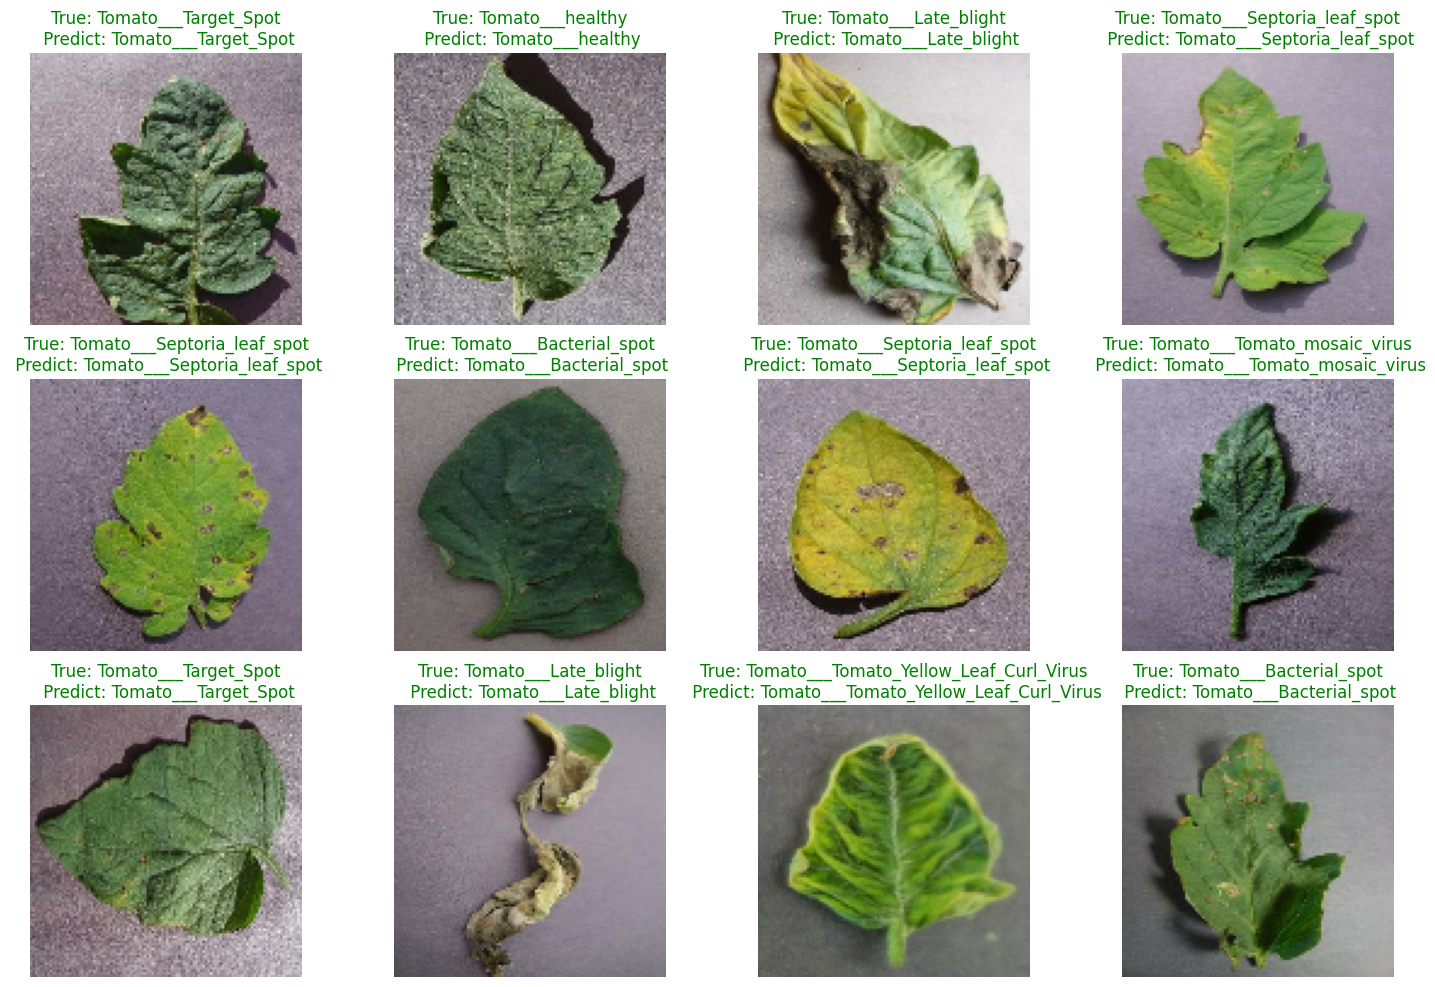

In [24]:
plt.figure(figsize=(18,12))
for image_batch,label_batch in test_data.take(1):
    predictions = load_model.predict(image_batch)
    predictions = np.argmax(predictions, axis=-1)
    for i in range(0,len(predictions) if len(predictions)<12 else 12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        true_class = class_names[np.argmax(label_batch[i])]
        predict_class = class_names[predictions[i]]
        title = f"""True: {true_class}\n Predict: {predict_class}"""
        plt.title(title, color='g' if true_class==predict_class else 'r')
        plt.axis("off")

# Confusion matrix

In [25]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with
  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels,
         )

  # Make x-axis labels appear on bottom
  ax.tick_params(axis='x', labelrotation=90)
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)


## Predict y_pred and get y_true

In [26]:
y_true = np.array([])
y_pred = np.array([])
for x, y in test_data:
    y_true = np.concatenate([y_true, np.argmax(y, axis=-1)], axis=0)
    y_pred = np.concatenate([y_pred, np.argmax(load_model.predict(x), axis=-1)], axis=0)

1/1 [==============================] - 0s 77ms/step


# Plot confusion matrix

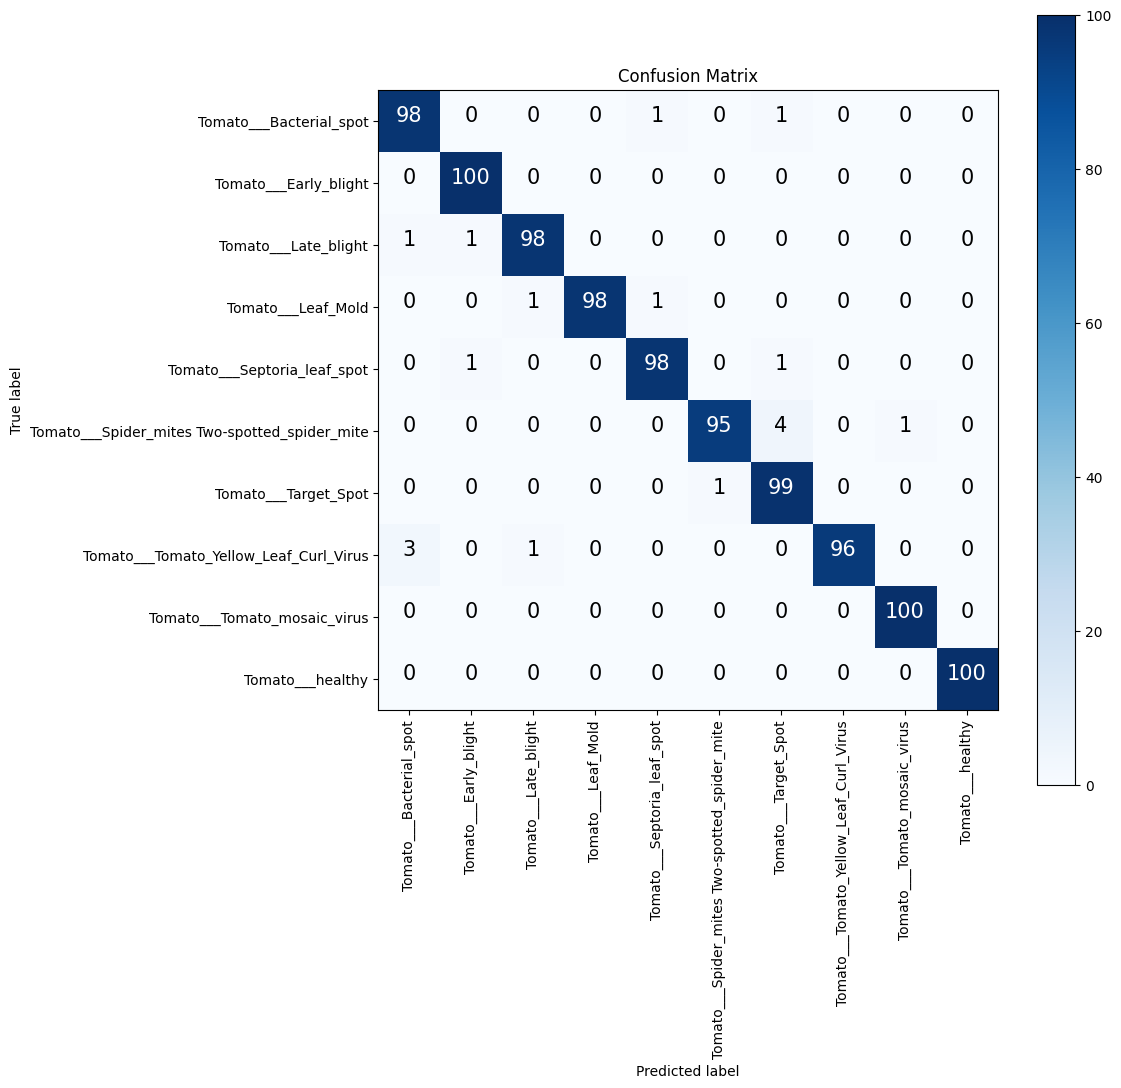

In [27]:
make_confusion_matrix(y_true, y_pred, class_names)